#Actividad 5

Barbe Victor
403715

In [ ]:
#import libraries
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from scipy.stats import norm

# Add path to the unique library ProBT's
import sys
sys.path.append('../lib')

# import the library
from probt import *
from auxFunctions import *


*******************************************************************
*                    ProBT Library   V3.1.99-20160616             *
*                                                                 *
*               Copyright 2001-2008: CNRS & Probayes              *
*               Copyright 2009-2020: Probayes                     *
*                      All rights reserved                        *
*******************************************************************



## matplotlib and warnings configuration

In [ ]:
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# warning configuration
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
taille_max = 177.5  #pour calculer la taille max on prend 155 la moyenne à laquelle on ajoute trois fois l'écart type
factor = 1.3

delta = (factor*taille_max)/1000

tip_type = plContinuousIntervalType(0.0, taille_max*factor, 1000)

Altura = plVariable("Altura", tip_type)

### Definir $P(Pigmeo)$

In [ ]:
Pigmeo = plVariable("Pigmeo", PL_BINARY_TYPE)
p=[0.84, 0.16]
P_Pigmeo = plProbTable(Pigmeo, p)

### Definir $P(Altura | Pigmeo = 0)$

In [ ]:
P_Altura_Other = plNormal(Altura, 155, 7.5)
P_Altura_Other

P(Altura) = plNormal(Altura,	155,	7.5)

### Graph de la distribution de $P(Altura | Pigmeo = 0)$ (proba de la taille sachant que pas pigmeo)

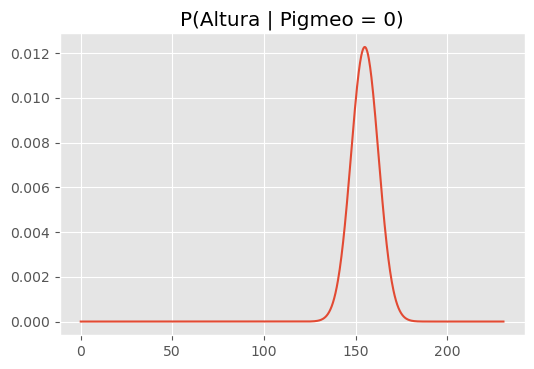

In [ ]:
plotDistribution(P_Altura_Other, False, "P(Altura | Pigmeo = 0)")

### Definir $P(Altura | Pigmeo = 1)$

In [ ]:
P_Altura_Pigemo = plNormal(Altura, 130, 9.5)
P_Altura_Pigemo

P(Altura) = plNormal(Altura,	130,	9.5)

### Graph de la distribution de$P(Altura | Pigmeo = 1) (proba de la taille sachant que c'est un pigmé)

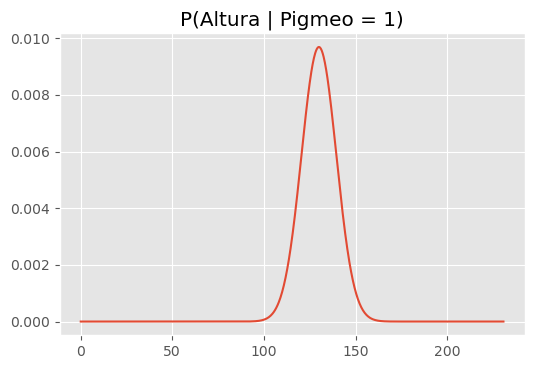

In [ ]:
plotDistribution(P_Altura_Pigemo, False, "P(Altura | Pigmeo = 1)")

### Definir $P(Altura | Pigmeo)$

In [ ]:
P_Altura_knowing_Pigmeo = plDistributionTable(Altura, Pigmeo)
P_Altura_knowing_Pigmeo.push(0, P_Altura_Other)
P_Altura_knowing_Pigmeo.push(1, P_Altura_Pigemo)
P_Altura_knowing_Pigmeo 

P(Altura|Pigmeo) = plDistributionTable {
Pigmeo = 0: 
plNormal(Altura,	155,	7.5)

Pigmeo = 1: 
plNormal(Altura,	130,	9.5)


}

In [ ]:
values = plValues(Pigmeo^Altura)
while True :
    print("P(Altura | Pigmeo)",values," = ",P_Altura_knowing_Pigmeo.compute(values)) 
    if not values.next():
        break

P(Altura | Pigmeo) { Pigmeo=0 Altura=0.115375 }   =  1.3118069407656854e-94
P(Altura | Pigmeo) { Pigmeo=0 Altura=0.346125 }   =  2.4751559089565603e-94
P(Altura | Pigmeo) { Pigmeo=0 Altura=0.576875 }   =  4.665778290218265e-94
P(Altura | Pigmeo) { Pigmeo=0 Altura=0.807625 }   =  8.786876816268294e-94
P(Altura | Pigmeo) { Pigmeo=0 Altura=1.038375 }   =  1.6532322943182017e-93
P(Altura | Pigmeo) { Pigmeo=0 Altura=1.269125 }   =  3.107578617781578e-93
P(Altura | Pigmeo) { Pigmeo=0 Altura=1.499875 }   =  5.8357848339528935e-93
P(Altura | Pigmeo) { Pigmeo=0 Altura=1.730625 }   =  1.0948769671985825e-92
P(Altura | Pigmeo) { Pigmeo=0 Altura=1.961375 }   =  2.0522027745953406e-92
P(Altura | Pigmeo) { Pigmeo=0 Altura=2.192125 }   =  3.842944597086446e-92
P(Altura | Pigmeo) { Pigmeo=0 Altura=2.422875 }   =  7.189470043434187e-92
P(Altura | Pigmeo) { Pigmeo=0 Altura=2.653625 }   =  1.3437501808248612e-91
P(Altura | Pigmeo) { Pigmeo=0 Altura=2.884375 }   =  2.509164272588307e-91
P(Altura | Pigmeo)

### Definir la joint distribution 
$P(Pigmeo Altura) = P(Pigmeo)*P(Altura | Pigmeo)$

In [ ]:
Joint_Distribution = plJointDistribution(Pigmeo^Altura, P_Pigmeo*P_Altura_knowing_Pigmeo)
Joint_Distribution

##Nous verifions a présent que la somme de la distribution est bien égale à 1

In [ ]:
sum = 0.0
var_values = plValues(Pigmeo^Altura)

while True:
    probability = Joint_Distribution.compute(var_values)*delta
    sum += probability
    if not var_values.next():
        break
sum

1.0

### Definir 
$P(Pigmeo | Altura)= \frac{P(Pigmeo)*P(Altura | Pigmeo)}{P(Altura)}=\frac{P(Pigmeo)*P(Altura | Pigmeo)}{\sum_{Pigmeo} P(Pigmeo)*P(Altura | Pigmeo)}$

In [ ]:
cnd_question = plCndDistribution()
s = Joint_Distribution.ask(Altura)

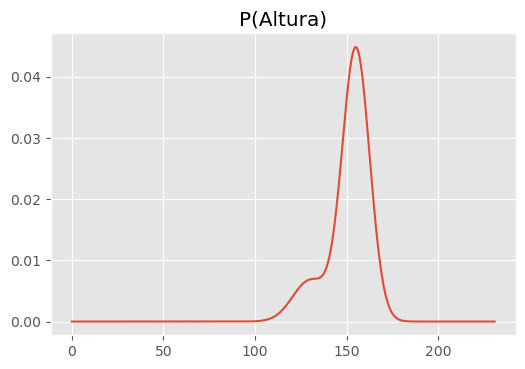

In [ ]:
plotDistribution(s, False, "P(Altura)")